In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data

In [3]:
# Load data
npz = np.load('./my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

# Preprocess data

In [4]:
# Scale X data into range 0.0 to 1.0
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

(array([29308353.,   442527.,   396522.,   338667.,   345633.,   401612.,
          352082.,   401555.,   476293.,  3190724.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

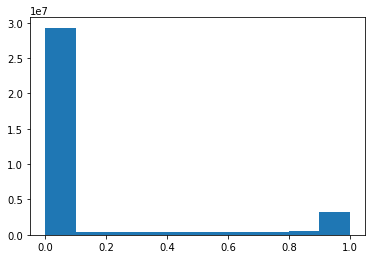

In [16]:
# Cofirm value range in X data
plt.hist(X_train_scaled.ravel())

In [15]:
# Split data into train and valid set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled, 
                                                      shuffle=True, test_size=0.25, stratify=y_train_scaled)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(34107, 28, 28) y_train.shape:(34107,)
Valid data shape, X_valid.shape:(11370, 28, 28) y_valid.shape:(11370,)


(array([3110., 2528., 4021., 3678., 3067., 2439., 3994., 3759., 4388.,
        3123.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

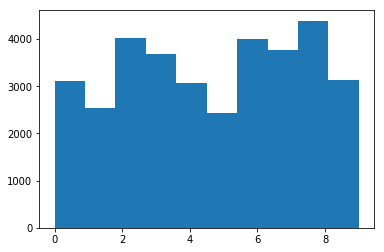

In [13]:
# Confirm distribution in y_train
plt.hist(y_train)

(array([1036.,  843., 1341., 1226., 1022.,  813., 1332., 1253., 1463.,
        1041.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

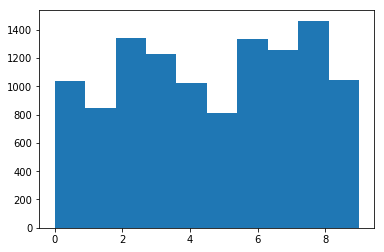

In [14]:
# Confirm distribution in y_valid
plt.hist(y_valid)

# Base line model

## Logistic regression

In [29]:
# Create data for linear regression
X_train_logreg, X_valid_logreg = X_train.reshape(-1,28*28), X_valid.reshape(-1,28*28)
print(X_train_logreg.shape)
print(X_valid_logreg.shape)

(34107, 784)
(11370, 784)


In [30]:
# Instantiate model
model_logreg = LogisticRegression(verbose=1)

In [31]:
model_logreg.fit(X_train_logreg, y_train)

/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

In [39]:
# Accuracy fot train and validation data
y_logreg_train_pred = model_logreg.predict(X_train_logreg)
y_logreg_valid_pred = model_logreg.predict(X_valid_logreg)

accuracy_logreg_train = accuracy_score(y_train, y_logreg_train_pred)
accuracy_logreg_valid = accuracy_score(y_valid, y_logreg_valid_pred)

print("Train acc", accuracy_logreg_train)
print("Valid acc", accuracy_logreg)

Train acc 0.9305421174538951
Valid acc 0.9197009674582234


In [70]:
matrix_logreg_valid = confusion_matrix(y_valid, y_logreg_valid_pred)
matrix_logreg_valid

array([[1005,    0,    3,    1,    3,    2,    9,    2,   11,    0],
       [   0,  818,    3,    2,    0,    3,    2,    0,   14,    1],
       [  16,   13, 1223,   19,    9,    2,   15,   15,   28,    1],
       [   2,    5,   34, 1084,    1,   42,    6,   10,   30,   12],
       [   1,    3,   12,    0,  954,    3,    5,    1,   13,   30],
       [   7,    1,    5,   27,   11,  698,   14,    2,   26,   22],
       [   4,    1,    6,    0,    4,   21, 1284,    1,   10,    1],
       [   3,    4,   16,    3,    8,    0,    2, 1184,    5,   28],
       [  10,   17,   24,   33,   11,   24,   15,    5, 1307,   17],
       [   7,    4,    3,   25,   37,    6,    3,   40,   16,  900]])

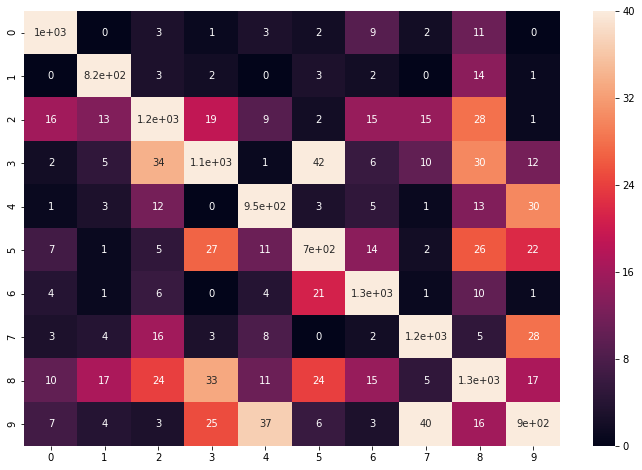

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(matrix_logreg_valid, annot=True, vmin=0, vmax=40)

## Random Forest

In [66]:
# Create data for linear regression
X_train_rndforest, X_valid_rndforest = X_train.reshape(-1,28*28), X_valid.reshape(-1,28*28)
print(X_train_rndforest.shape)
print(X_valid_rndforest.shape)

(34107, 784)
(11370, 784)


In [65]:
# Instatiate model
model_rndforest = RandomForestClassifier()

In [67]:
# Train model
model_rndforest.fit(X_train_rndforest, y_train)

/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
# Accuracy fot train and validation data
y_rndforest_train_pred = model_rndforest.predict(X_train_rndforest)
y_rndforest_valid_pred = model_rndforest.predict(X_valid_rndforest)

accuracy_rndforest_train = accuracy_score(y_train, y_rndforest_train_pred)
accuracy_rndforest_valid = accuracy_score(y_valid, y_rndforest_valid_pred)

print("Train acc", accuracy_rndforest_train)
print("Valid acc", accuracy_rndforest_valid)

Train acc 0.9991497346585745
Valid acc 0.9400175901495162


In [72]:
matrix_rndforest_valid = confusion_matrix(y_valid, y_rndforest_valid_pred)
matrix_rndforest_valid

array([[1007,    0,    4,    1,    3,    5,    9,    0,    5,    2],
       [   0,  826,    2,    4,    1,    1,    2,    2,    4,    1],
       [  12,    5, 1275,    8,    4,    1,   12,    8,   10,    6],
       [   2,    1,   37, 1132,    0,   22,    3,   10,   16,    3],
       [   5,    3,    9,    0,  973,    1,    4,    2,    7,   18],
       [   7,    2,    3,   36,    7,  719,   11,    1,   16,   11],
       [   8,    0,    2,    3,    5,   11, 1297,    0,    6,    0],
       [   1,    4,   14,    1,   12,    1,    0, 1194,    1,   25],
       [   4,    9,   29,   15,   11,   24,   12,    4, 1344,   11],
       [  10,    0,    6,   19,   45,    7,    1,   15,   17,  921]])

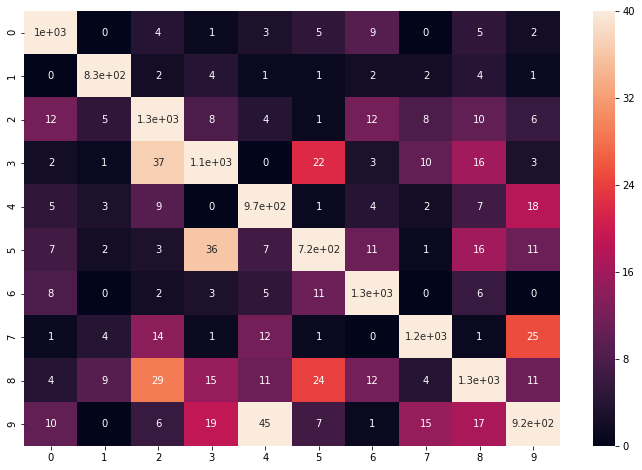

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_rndforest_valid, annot=True, vmin=0, vmax=40)

## Compare 2 models

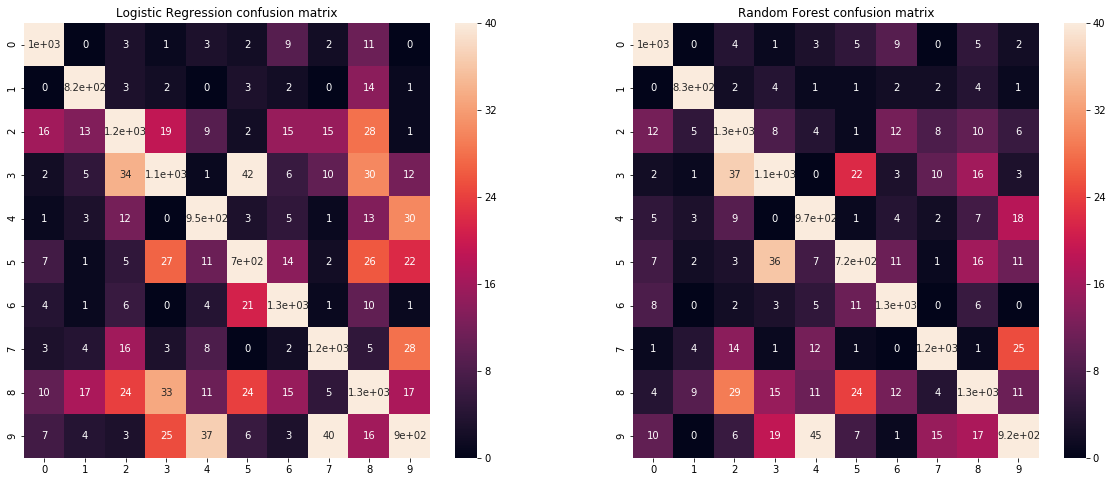

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 40
sns.heatmap(matrix_logreg_valid, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matrix_rndforest_valid, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("Logistic Regression confusion matrix")
axs[1].set_title("Random Forest confusion matrix")
plt.show()